In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

### importing all libraries

In [108]:
df=pd.read_csv('train-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### Data Preprocessing(Cleaning etc)

In [109]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### replacing 0,null and null bhp with nan and drop New_price because too many nan values

In [110]:
df=df.drop('New_Price',axis='columns')
df=df.replace(0,np.nan)
df=df.replace('null',np.nan)
df=df.replace('null bhp',np.nan)

In [111]:
df=df.drop_duplicates()

In [112]:
df.isnull().sum()

Unnamed: 0             1
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

### imputing with median for mileage

In [113]:
b=[]
x=df['Mileage']
for i in x:
    try:
        b.append(float(i.split()[0]))
    except:
        continue

In [114]:
b=pd.Series(b)
df['Mileage']=b

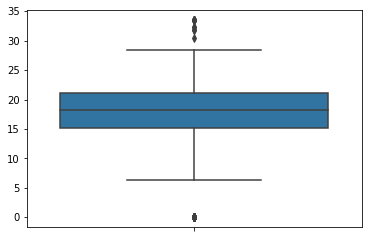

In [115]:
sns.boxplot(y=b)

In [116]:
median=stats.median(b)


In [117]:

median

18.15

In [118]:
a=(median)
df['Mileage']=df['Mileage'].fillna(a)

In [119]:
df.isnull().sum()

Unnamed: 0             1
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

### Imputing Engine values with mean

In [120]:
b=[]
x=df['Engine']
for i in x:
    try:
        b.append(float(i.split()[0]))
    except:
        continue

In [121]:
b

[998.0,
 1582.0,
 1199.0,
 1248.0,
 1968.0,
 814.0,
 1461.0,
 2755.0,
 1598.0,
 1248.0,
 1462.0,
 1497.0,
 1248.0,
 2179.0,
 2179.0,
 2477.0,
 1498.0,
 1248.0,
 1461.0,
 2143.0,
 1995.0,
 1248.0,
 1984.0,
 1197.0,
 1598.0,
 1497.0,
 1461.0,
 998.0,
 1199.0,
 2494.0,
 1461.0,
 1798.0,
 2696.0,
 2698.0,
 1598.0,
 1061.0,
 1248.0,
 1198.0,
 2987.0,
 1199.0,
 796.0,
 624.0,
 1198.0,
 1197.0,
 1999.0,
 1798.0,
 1991.0,
 2694.0,
 1120.0,
 2498.0,
 1968.0,
 1248.0,
 1248.0,
 1248.0,
 1197.0,
 1598.0,
 799.0,
 1197.0,
 1995.0,
 998.0,
 2393.0,
 1399.0,
 1796.0,
 2148.0,
 1396.0,
 1968.0,
 1497.0,
 1950.0,
 1248.0,
 1396.0,
 4806.0,
 2179.0,
 1197.0,
 1461.0,
 1198.0,
 1968.0,
 1399.0,
 1998.0,
 2494.0,
 1086.0,
 1248.0,
 1193.0,
 1198.0,
 1399.0,
 1248.0,
 1497.0,
 1995.0,
 1197.0,
 1197.0,
 1086.0,
 1198.0,
 2982.0,
 1968.0,
 1498.0,
 2179.0,
 1498.0,
 1199.0,
 1493.0,
 998.0,
 1598.0,
 1396.0,
 1197.0,
 1198.0,
 2967.0,
 1197.0,
 796.0,
 1197.0,
 2993.0,
 2179.0,
 1582.0,
 2755.0,
 1196.0,
 

In [122]:
b=pd.Series(b)
df['Engine']=b

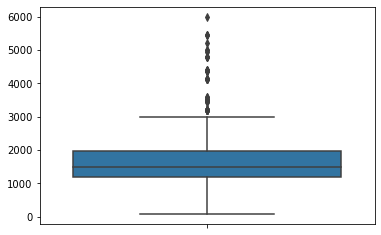

In [123]:
sns.boxplot(y=b)

In [124]:
mean=stats.mean(b)
mean

1621.276449941501

In [125]:
a=(mean)
df['Engine']=df['Engine'].fillna(a)

In [126]:
df.isnull().sum()

Unnamed: 0             1
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                143
Seats                 43
Price                  0
dtype: int64

### Imputing power values with mean

In [127]:
df['Power']=df.iloc[:,10].str.replace('bhp','')

In [128]:
b=[]
x=df['Power']
for i in x:
    try:
        b.append(float(i.split()[0]))
    except:
        continue

In [129]:
b=pd.Series(b)
mean=stats.mean(b)
df['Power']=df['Power'].fillna(mean)

In [130]:
df.isnull().sum()

Unnamed: 0            1
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                43
Price                 0
dtype: int64

In [131]:
df.isnull().sum()

Unnamed: 0            1
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                43
Price                 0
dtype: int64

### Impute seat values with mode

In [132]:
seats=df['Seats'].unique()
b=[]
for us in seats:
    b.append(df[df['Seats']==us].count()[1])

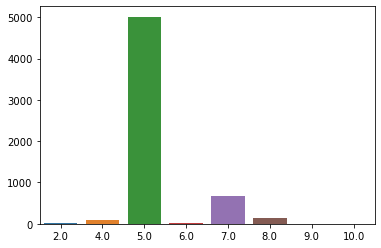

In [133]:
sns.barplot(seats,b)

In [134]:
df['Seats']=df['Seats'].fillna(5)

In [135]:
df=df.dropna()
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [136]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,6018.000000,6018.000000,6.018000e+03,6018.000000,6018.000000,6018.000000,6018.000000
mean,3009.500000,2013.358757,5.873618e+04,18.133559,1621.380019,5.277667,9.480753
std,1737.391292,3.269727,9.127627e+04,4.580608,599.549835,0.803538,11.188403
min,1.000000,1998.000000,1.710000e+02,0.000000,72.000000,2.000000,0.440000
25%,1505.250000,2011.000000,3.400000e+04,15.170000,1198.000000,5.000000,3.500000
50%,3009.500000,2014.000000,5.300000e+04,18.150000,1494.000000,5.000000,5.640000
75%,4513.750000,2016.000000,7.300000e+04,21.100000,1969.000000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


In [137]:
df.shape

(6018, 13)

## Data Visualisation

## Plot of price of vehicles(Target Variable)

(0.0, 160.0)

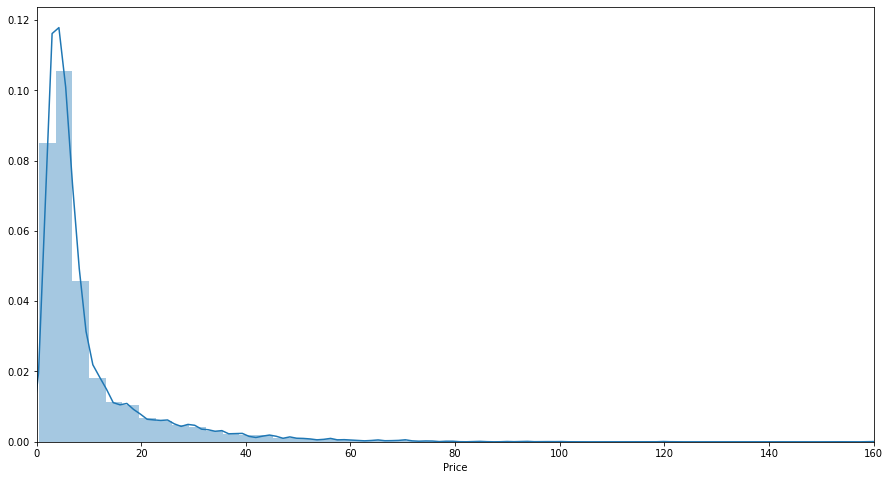

In [138]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Price'])
plt.xlim([0,160])

## BoxPlot of Fuel_types vs Price (helps us understand relation between different fuels and the cost of the vehicle)

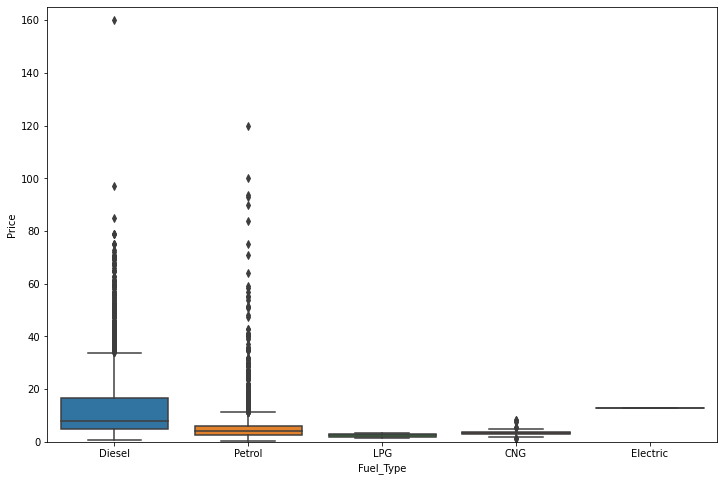

In [139]:
var = 'Fuel_Type'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

## Plot of Year vs Price(Helps us understand the relation between year and sales of vehicles)

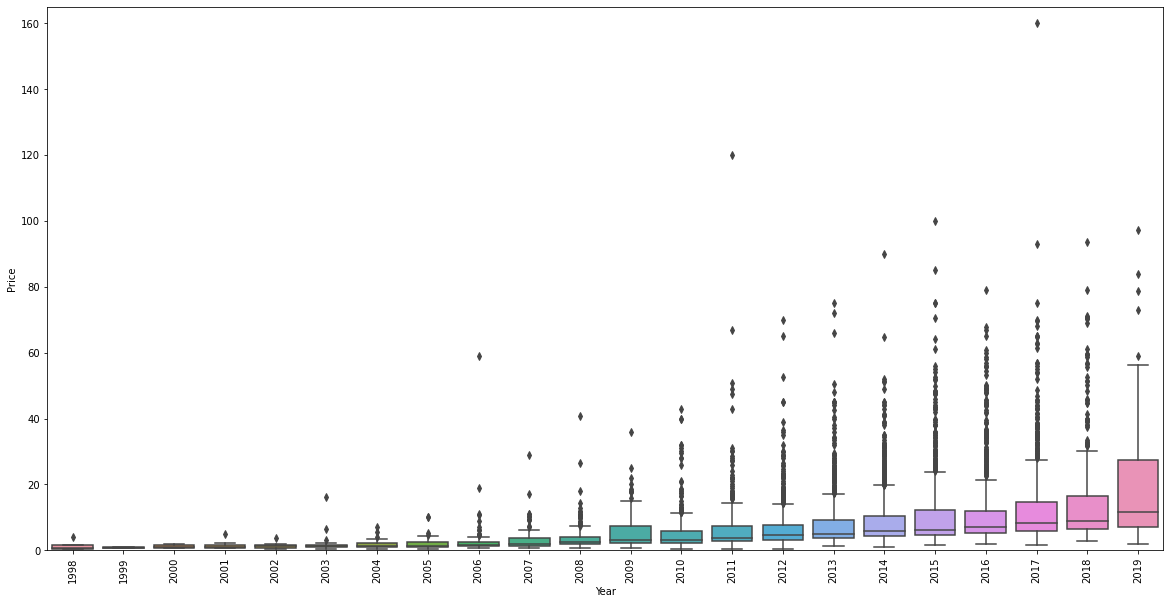

In [140]:
var = 'Year'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

## Owner type vs Price(Helps us understand the relation between the number of times a person has bought a car and how much are they spending for their next car)

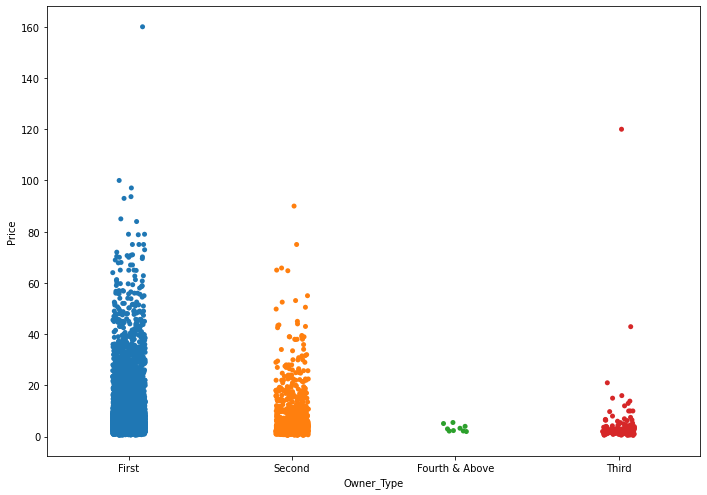

In [141]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = df) 

<Figure size 1440x720 with 0 Axes>

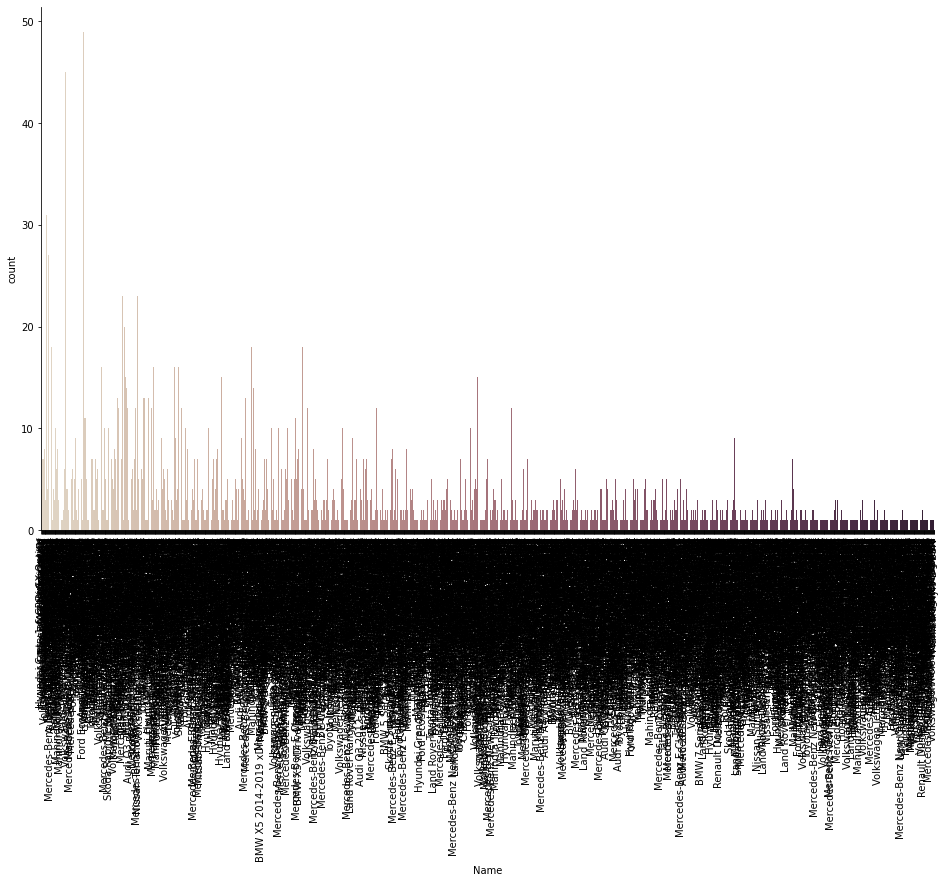

In [142]:
var = "Name"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

KeyboardInterrupt: 

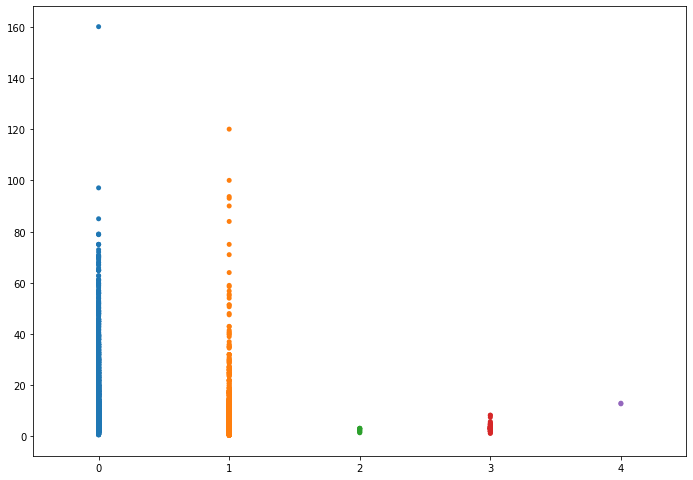

In [37]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = df)


As for now we have left with only 5 categorical features:

Location,
Fuel_Type,
Transmission,
Owner_Type,
Company,

For hadeling categorical data. We modtly use these 2 techniques:

OneHotEncoder and
LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

## LOCATION

In [143]:
df['Location'].value_counts()

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

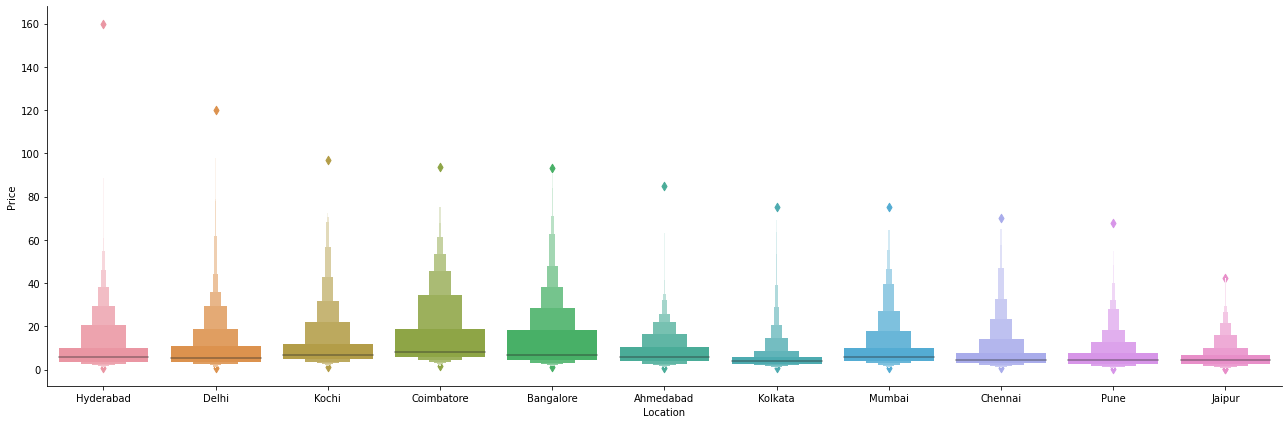

In [144]:
sns.catplot(y='Price',x='Location',data=df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

In [145]:
Location = df[['Location']]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0


## Fuel

In [146]:
var = 'Fuel_Type'
df[var].value_counts()


Diesel      3205
Petrol      2746
CNG           55
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

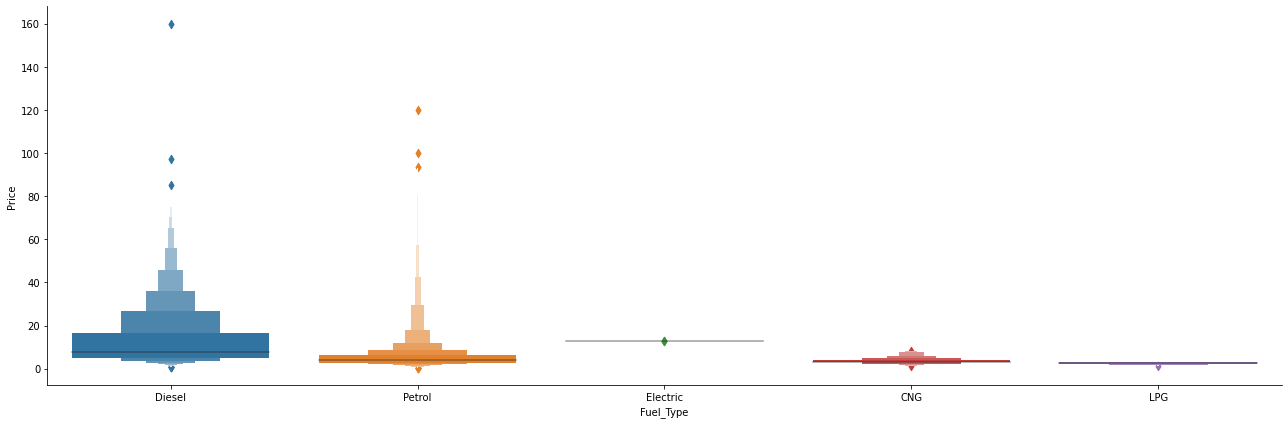

In [147]:
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

One-hot-encoding here also

In [148]:
Fuel_t = df[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0


## Transmission

In [149]:
df['Transmission'].value_counts()

Manual       4298
Automatic    1720
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

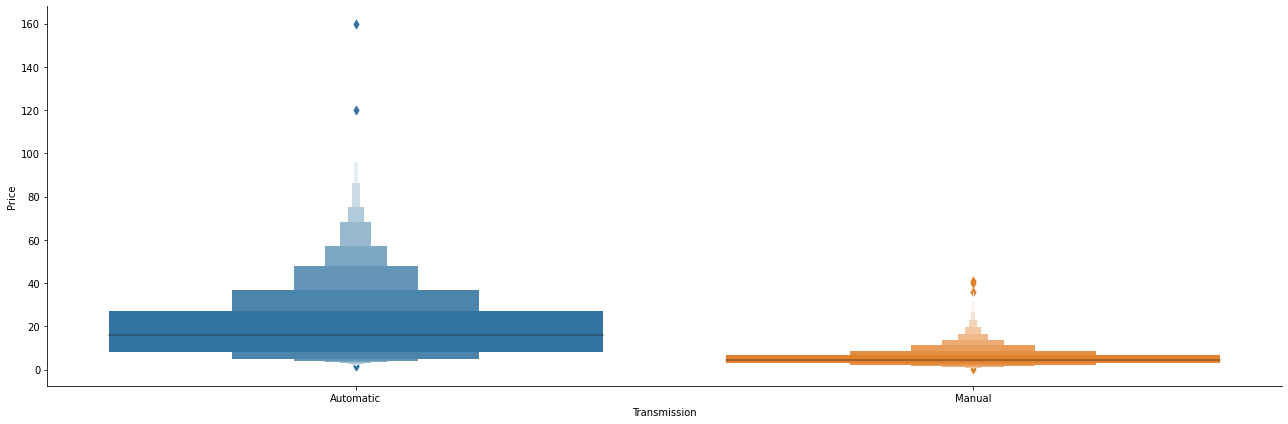

In [150]:
sns.catplot(y='Price',x='Transmission',data=df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Here also one hot encoding

In [151]:
Transmission = df[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
1,1
2,1
3,1
4,0
5,1


## Owner

In [152]:
var = 'Owner_Type'
df[var].value_counts()

First             4928
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

Since ordered ,LabelEncoding

In [153]:
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.2,5.0,12.50
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.7,5.0,4.50
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.8,5.0,17.74
5,5.0,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,1,21.10,814.0,55.2,5.0,2.35


In [154]:
var = 'Name'
df[var].value_counts()

Mahindra XUV500 W8 2WD             49
Maruti Swift VDI                   45
Honda City 1.5 S MT                34
Maruti Swift Dzire VDI             34
Maruti Swift VDI BSIV              31
                                   ..
Maruti Wagon R LX DUO BSIII         1
Mahindra KUV 100 mFALCON G80 K8     1
Mercedes-Benz CLA 200 CGI Sport     1
Honda Accord VTi-L (AT)             1
Maruti Ritz VDI (ABS) BS IV         1
Name: Name, Length: 1876, dtype: int64

In [155]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.00000,126.2,5.0,12.50
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.00000,88.7,5.0,4.50
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.00000,88.76,7.0,6.00
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.00000,140.8,5.0,17.74
5,5.0,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,1,21.10,814.00000,55.2,5.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014.0,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,14.00,1621.27645,74,5.0,4.75
6015,6015.0,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,18.90,1621.27645,71,5.0,4.00
6016,6016.0,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,25.44,1621.27645,112,8.0,2.90
6017,6017.0,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.15,1621.27645,67.1,5.0,2.65


## Concatinate the encoder values into the dataset

In [158]:
df= pd.concat([df,Location,Fuel_t,Transmission],axis=1)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,...,0,0,0,0,1,1,0,0,0,1
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,...,0,0,0,0,0,1,0,0,0,1
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,...,0,0,0,0,0,1,0,0,0,0
5,5.0,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,1,21.10,814.0,...,0,0,0,0,0,0,0,1,0,1


## Drop the columns that are not needed

In [52]:
df.drop(["Name","Location","Fuel_Type","Transmission",],axis=1,inplace=True)
df.head()

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
1,1.0,2015,41000,1,19.67,1582.0,126.2,5.0,12.50,0,...,0,0,0,0,1,1,0,0,0,1
2,2.0,2011,46000,1,18.20,1199.0,88.7,5.0,4.50,0,...,0,0,0,0,0,0,0,0,1,1
3,3.0,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,...,0,0,0,0,0,1,0,0,0,1
4,4.0,2013,40670,2,15.20,1968.0,140.8,5.0,17.74,0,...,0,0,0,0,0,1,0,0,0,0
5,5.0,2012,75000,1,21.10,814.0,55.2,5.0,2.35,0,...,0,0,0,0,0,0,0,1,0,1


# Feature Selection

## Setting Price as our target value and others as our inputs

In [106]:
X=df.iloc[:,:9]
X

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1.0,2015,41000,1,19.67,1582.00000,126.2,5.0,12.50
2,2.0,2011,46000,1,18.20,1199.00000,88.7,5.0,4.50
3,3.0,2012,87000,1,20.77,1248.00000,88.76,7.0,6.00
4,4.0,2013,40670,2,15.20,1968.00000,140.8,5.0,17.74
5,5.0,2012,75000,1,21.10,814.00000,55.2,5.0,2.35
...,...,...,...,...,...,...,...,...,...
6014,6014.0,2014,27365,1,14.00,1621.27645,74,5.0,4.75
6015,6015.0,2015,100000,1,18.90,1621.27645,71,5.0,4.00
6016,6016.0,2012,55000,2,25.44,1621.27645,112,8.0,2.90
6017,6017.0,2013,46000,1,18.15,1621.27645,67.1,5.0,2.65


In [54]:
Z=df.iloc[:,10:]
Z

,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,1,0,0,0,0,0,0,1,0,0,0,1
6015,0,0,0,0,1,0,0,0,0,1,0,0,0,1
6016,0,0,0,0,1,0,0,0,0,1,0,0,0,1
6017,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [55]:
X=pd.concat([X,Z],axis=1)

In [56]:
d=df[["Kilometers_Driven","Mileage","Engine","Power","Seats","Price"]]


In [159]:
Y=df['Price']
Y

1       12.50
2        4.50
3        6.00
4       17.74
5        2.35
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6018, dtype: float64

## Print the correlation between different attributes in the df

In [160]:
df.corr()

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
Unnamed: 0,1.000000,0.002059,-0.008694,-0.004584,0.024213,-0.004425,-0.010279,-0.020479,-0.010941,0.016145,...,-0.006558,0.000843,-0.017649,-0.008520,0.001408,-0.015455,0.017480,-0.007113,0.014753,0.015777
Year,0.002059,1.000000,-0.173038,-0.397269,0.238629,0.016852,0.014771,0.305248,-0.042853,-0.132057,...,-0.072807,0.228504,-0.028740,-0.006785,-0.112718,0.126026,0.000788,-0.031929,-0.127666,-0.096962
Kilometers_Driven,-0.008694,-0.173038,1.000000,0.085349,-0.048000,0.005931,0.083837,-0.011477,-0.000787,0.102352,...,0.038389,-0.053004,-0.051895,-0.057784,0.043965,0.104476,-0.002345,0.000550,-0.103892,0.025648
Owner_Type,-0.004584,-0.397269,0.085349,1.000000,-0.112818,-0.015746,0.011769,-0.097614,0.105242,0.131023,...,0.066548,-0.107950,-0.097937,-0.005482,0.128943,-0.045442,-0.008106,-0.000258,0.045223,0.008844
Mileage,0.024213,0.238629,-0.048000,-0.112818,1.000000,-0.013640,-0.221344,-0.216537,-0.070550,-0.003163,...,0.042971,0.034845,0.046903,-0.042271,-0.023241,0.094494,-0.012852,-0.003042,-0.115567,0.246842
Engine,-0.004425,0.016852,0.005931,-0.015746,-0.013640,1.000000,0.001501,0.024651,-0.013521,-0.023292,...,-0.021089,0.020389,0.004614,0.013095,-0.002085,0.005591,0.016412,-0.005945,-0.008046,-0.028631
Seats,-0.010279,0.014771,0.083837,0.011769,-0.221344,0.001501,1.000000,0.053750,0.015384,0.013435,...,-0.012006,-0.029138,-0.044002,-0.003112,-0.005237,0.308839,-0.006301,-0.014099,-0.302473,0.073509
Price,-0.020479,0.305248,-0.011477,-0.097614,-0.216537,0.024651,0.053750,1.000000,0.086501,-0.046167,...,-0.089084,0.052874,-0.106646,-0.001448,-0.083593,0.320566,0.005532,-0.025504,-0.309502,-0.585995
Location_Bangalore,-0.010941,-0.042853,-0.000787,0.105242,-0.070550,-0.013521,0.015384,0.086501,1.000000,-0.075209,...,-0.068269,-0.087591,-0.078560,-0.097693,-0.085387,0.039903,-0.004586,-0.010260,-0.034350,-0.064809
Location_Chennai,0.016145,-0.132057,0.102352,0.131023,-0.003163,-0.023292,0.013435,-0.046167,-0.075209,1.000000,...,-0.081175,-0.104150,-0.093412,-0.116162,-0.101530,0.031437,0.027759,-0.012200,-0.028453,0.028392


## Plot a heatmap representing the pearson-correlation-coeff between different attributes

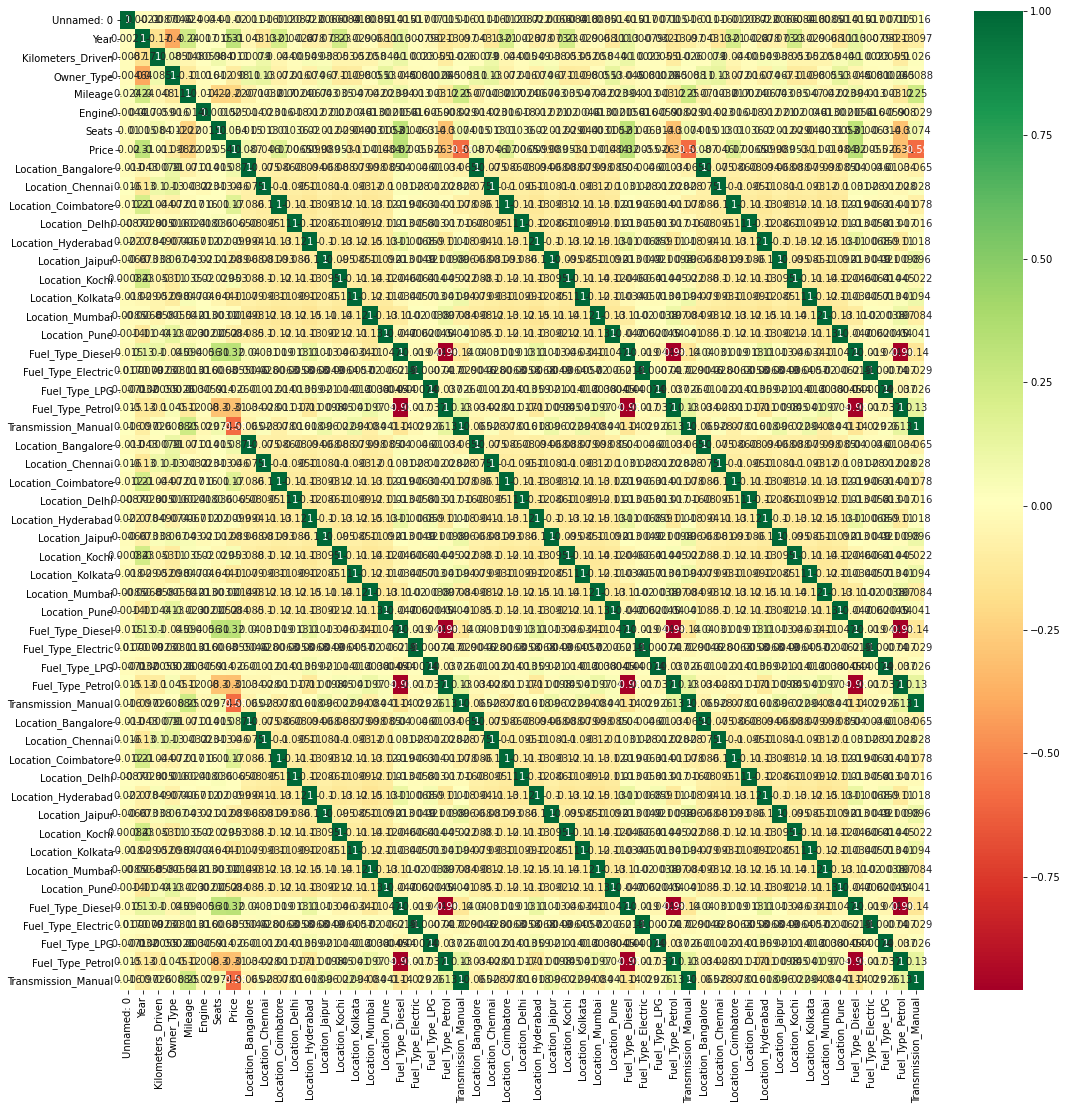

In [161]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Using sklearn we scale the data using standard scaler and split the data into training and testing set

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=25)
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)
X

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1.0,2015,41000,1,19.67,1582.00000,126.2,5.0,12.50
2,2.0,2011,46000,1,18.20,1199.00000,88.7,5.0,4.50
3,3.0,2012,87000,1,20.77,1248.00000,88.76,7.0,6.00
4,4.0,2013,40670,2,15.20,1968.00000,140.8,5.0,17.74
5,5.0,2012,75000,1,21.10,814.00000,55.2,5.0,2.35
...,...,...,...,...,...,...,...,...,...
6014,6014.0,2014,27365,1,14.00,1621.27645,74,5.0,4.75
6015,6015.0,2015,100000,1,18.90,1621.27645,71,5.0,4.00
6016,6016.0,2012,55000,2,25.44,1621.27645,112,8.0,2.90
6017,6017.0,2013,46000,1,18.15,1621.27645,67.1,5.0,2.65


In [281]:
from sklearn.metrics import mean_squared_error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


## Linear Regression

MAPE =  111.27739400728093
RMSE =  14.727668020883248


Text(0, 0.5, 'Predicted')

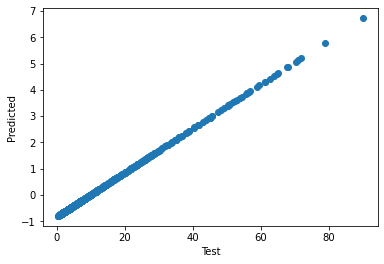

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred= linear_reg.predict(X_test)
rmslinreg =mean_squared_error(y_test, y_pred, squared=False)
mape_linreg = MAPE(y_test, y_pred)
print("MAPE = ",mape_linreg)
print("RMSE = ",rmslinreg)
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predicted')

## Non-Linear Regression( RandomForestRegressor)

RMSE =  1.041997631847476
MAPE =  4.5387621637627875


Text(0, 0.5, 'Predicted')

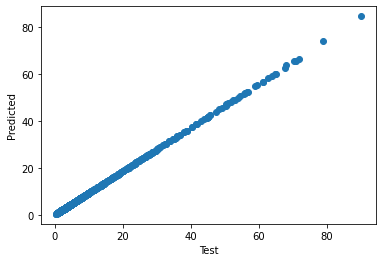

In [284]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
rmsnonlinreg =mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ",rmsnonlinreg)
mape_nonlinreg = MAPE(y_test, y_pred)
print("MAPE = ",mape_nonlinreg)
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Ridge Regression

In [285]:
from sklearn.linear_model import Ridge
classifier = Ridge(alpha = 1)
classifier.fit(X_train, y_train.ravel())

Ridge(alpha=1)

In [286]:
y_pred = classifier.predict(X_test)

RMSE =  1.054019975464708
MAPE =  4.513272578127172


Text(0, 0.5, 'Predicted')

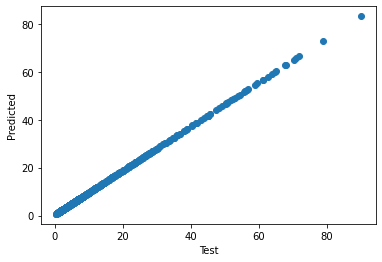

In [287]:
from sklearn.metrics import accuracy_score
# acc_logreg = accuracy_score(y_test, y_pred)*100
# print ("Accuracy :", acc_logreg,'%')
rmsrreg =mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ",rmsrreg)
mape_rreg = MAPE(y_test, y_pred)
print("MAPE = ",mape_rreg)
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Lasso Regression


In [259]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.6)

In [260]:
clf.fit(X_train, y_train)

Lasso(alpha=0.6)

In [261]:
y_pred = clf.predict(X_test)

RMSE =  1.054019975464708
MAPE =  4.513272578127172


Text(0, 0.5, 'Predicted')

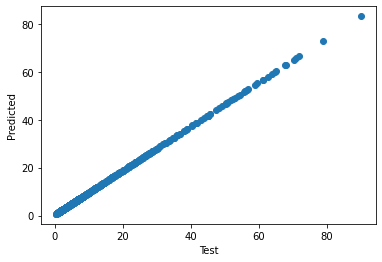

In [288]:
from sklearn.metrics import mean_squared_error
rmslassoreg =mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ",rmslassoreg)
mape_lassoreg = MAPE(y_test, y_pred)
print("MAPE = ",mape_lassoreg)
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Decision Tree

In [289]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

RMSE =  1.0274124838447958
MAPE =  4.541285674435888


Text(0, 0.5, 'Predicted')

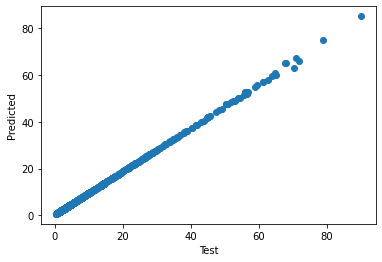

In [290]:
clf = DecisionTreeRegressor(random_state = 3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#acc_dt = (y_test, y_pred)*100
# print('Accuracy :',accuracy_score(y_test, y_pred)*100,'%')
rmsdt =mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ",rmsdt)
mape_dt = MAPE(y_test, y_pred)
print("MAPE = ",mape_dt)
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Knn Regressor

In [291]:
from sklearn.neighbors import KNeighborsRegressor

In [292]:
rmsknn = 100
j=0
for i in range(5, 70):
    clf = KNeighborsRegressor(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    a = mean_squared_error(y_test, y_pred, squared=False)
    if(rmsknn>=a):
        rmsknn = a
        j=i
print('RMSE =',rmsknn,'at',j,'neighbors')


RMSE = 3.128087630054403 at 6 neighbors


MAPE =  25.377343473655944


Text(0, 0.5, 'Predicted')

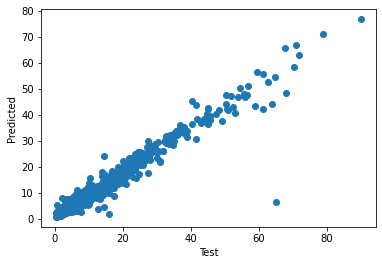

In [293]:
clf = KNeighborsRegressor(n_neighbors=j)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mape_knn = MAPE(y_test, y_pred)
print("MAPE = ",mape_knn)
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predicted')

In [299]:
mydata = [['Linear Regression', rmslinreg,mape_linreg],['Non Linear Regression',rmsnonlinreg,mape_nonlinreg],['Ridge Regression',rmsrreg,mape_rreg],['Lasso Reagression',rmslassoreg,mape_lassoreg],['Decision Tree',rmsdt,mape_dt],['KNN Regressor',rmsknn,mape_knn]]

In [300]:
Head = ['Model', 'RMSE','MAPE'] 
print(tabulate(mydata, headers=Head, tablefmt="grid"))

+-----------------------+----------+-----------+
| Model                 |     RMSE |      MAPE |
+=======================+==========+===========+
| Linear Regression     | 14.7277  | 111.277   |
+-----------------------+----------+-----------+
| Non Linear Regression |  1.042   |   4.53876 |
+-----------------------+----------+-----------+
| Ridge Regression      |  1.05402 |   4.51327 |
+-----------------------+----------+-----------+
| Lasso Reagression     |  1.05402 |   4.51327 |
+-----------------------+----------+-----------+
| Decision Tree         |  1.02741 |   4.54129 |
+-----------------------+----------+-----------+
| KNN Regressor         |  3.12809 |  25.3773  |
+-----------------------+----------+-----------+
